In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x=0.0, t=0.0):
    """Функция источника"""
    return 0

def k(x=0.0):
    """Коэффициентная функция"""
    return 1

def fi(x=0.0):
    """Функция начальных условий"""
    return np.sin(np.pi * x)

def m1(t=0.0):
    """Граничное условие при x=0"""
    return 0.0

def m2(t=0.0):
    """Граничное условие при x=L"""
    return 0.0

def analytical_solution(x: float, t: float) -> float:
    """Аналитическое решение"""
    return np.exp(-(np.pi**2) * t) * np.sin(np.pi * x)

In [ ]:
def tridiagonal_matrix_algorithm(N, A, B, C, F, hi_1, mu_1, hi_2, mu_2):
    a = np.zeros(N)
    b = np.zeros(N)
    y = np.zeros(N + 1)

    a[0] = hi_1
    b[0] = mu_1

    for i in range(N - 1):
        d = C[i] - A[i] * a[i]
        a[i + 1] = B[i] / d
        b[i + 1] = (F[i] + A[i] * b[i]) / d

    y[N] = (mu_2 + hi_2 * b[N - 1]) / (1 - hi_2 * a[N - 1])

    for i in range(N - 1, -1, -1):
        y[i] = a[i] * y[i + 1] + b[i]

    return y

In [ ]:
def finite_difference(n: int,
                      F: callable,
                      k: callable,
                      fi: callable,
                      m1: callable,
                      m2: callable,
                      sigma: float,
                      h: float,
                      tau: float,
                      T_max: float) -> list[list]:

    time_steps = int(T_max / tau) + 1
    cost = sigma * tau / (h ** 2)
    y = np.zeros((time_steps, n + 1))

    y[0][0] = m1(0)  # Левое граничное условие
    y[0][n] = m2(0)  # Правое граничное условие

    for i in range(1, n):
        y[0][i] = fi(i * h)  # Начальные условия в пространственных узлах

    # Коэффициенты для схемы конечных разностей
    a = [cost * k(i + 0.5) for i in range(n - 1)]  # Коэффициенты для соседних узлов слева
    b = [cost * k(i + 1.5) for i in range(n - 1)]  # Коэффициенты для соседних узлов справа
    c = [a[i] + b[i] + 1.0 for i in range(n - 1)]  # Общий коэффициент

    # Цикл по временным шагам
    for i in range(1, time_steps):
        f_values = []  # Список для значений f

        # Вычисление значений f для текущего временного шага
        for l in range(n - 1):
            f_value = (
                tau * (
                    sigma * f((l + 1) * h, i * tau) +                       # Вклад функции источника в текущий момент времени
                    (1 - sigma) * f((l + 1) * h, (i - 1) * tau)             # Вклад функции источника в предыдущий момент времени
                ) +
                (tau * (1 - sigma) / (h ** 2)) *                            # Член, связанный с пространственным шагом
                (
                    k(l + 1.5) * (y[i - 1][l + 2] - y[i - 1][l + 1]) -      # Разность температур в правом соседнем узле
                    k(l + 0.5) * (y[i - 1][l + 1] - y[i - 1][l])            # Разность температур в левом соседнем узле
                )
            )
            f_values.append(f_value + y[i - 1][l + 1])                      # Обновление значения в узле с учетом предыдущего значения

        # Обновление решения на следующем временном шаге с помощью метода прогонки
        y[i] = tridiagonal_matrix_algorithm(n, a, b, c, f_values, 0.0, m1(i * tau), 0.0, m2(i * tau))

    return y

In [ ]:
def solve_heat_equation(n: int,
                        sigma: float,
                        h: float,
                        tau: float,
                        T_max: float,
                        f: callable,
                        k: callable,
                        fi: callable,
                        m1: callable,
                        m2: callable) -> None:

    time_steps = int(T_max / tau) + 1

    # Решение уравнения методом конечных разностей
    y = finite_difference(n, f, k, fi, m1, m2, sigma, h, tau, T_max)

    # Ошибка
    max_error = 0.0
    for i in range(time_steps):
        for l in range(n + 1):
            current_error = abs(y[i][l] - analytical_solution(h * l, i * tau))
            if current_error > max_error:
                max_error = current_error

    # График
    x = np.linspace(0, 1, n + 1)

    fig = plt.figure(figsize=(7, 10))
    ax = fig.add_subplot()

    ax.plot(x, y[50], 'b', label='Численное t=0.5')
    ax.plot(x, y[100], 'r', label='Численное t=1.0')
    ax.plot(x, y[150], 'g', label='Численное t=1.5')

    ax.plot(x, [analytical_solution(xi, 0.5) for xi in x], 'b--', label='Аналитическое t=0.5')
    ax.plot(x, [analytical_solution(xi, 1.0) for xi in x], 'r--', label='Аналитическое t=1.0')
    ax.plot(x, [analytical_solution(xi, 1.5) for xi in x], 'g--', label='Аналитическое t=1.5')

    ax.grid()
    plt.ylabel('Температура')
    plt.xlabel('Координата')
    plt.title('Решение задачи теплопроводности')
    plt.legend()
    plt.show()

    print("Ошибка =", max_error)
    print("Временные шаги: t = 0.5, 1.0, 1.5")

Абсолютно устойчивая схема: гладкие линии без колебаний.

Условно устойчивая схема: гладкие линии при выполнении условий, но возможны колебания при нарушении.

Неустойчивая схема: резкие изменения и колебания решения.

 # Абсолютно устойчивая схема

 Для абсолютно устойчивой схемы решение остается стабильным при любых значениях шагов по времени τ и по пространству h.

 Температура плавно изменяется во времени без резких колебаний или скачков.
 Линии на графике гладкие и непрерывные, что указывает на стабильное поведение.

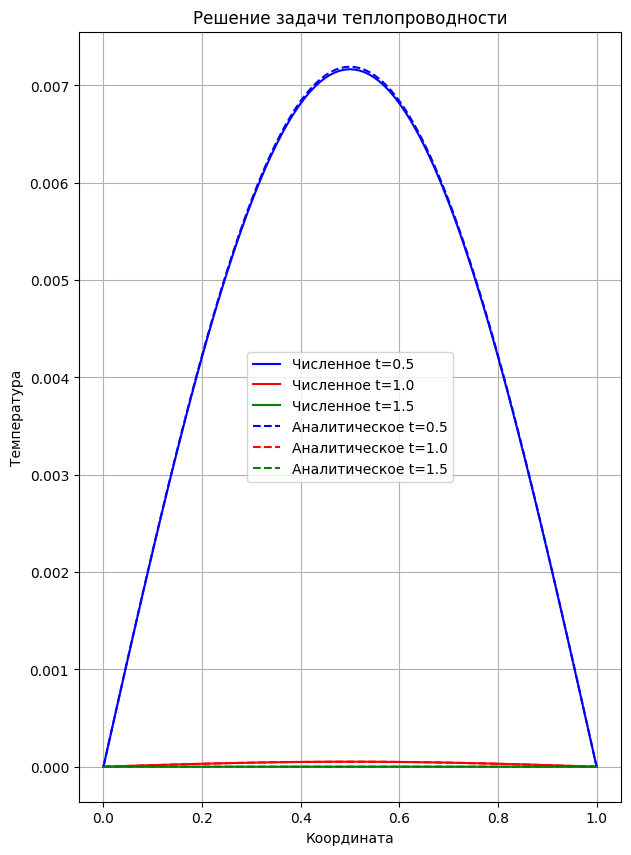

Ошибка = 0.00026861082377710455
Временные шаги: t = 0.5, 1.0, 1.5


In [ ]:
sigma = 0.5
h = 0.01 # можно брать какое угодно tau
tau = 0.01
T_max = 3
N = 100

solve_heat_equation(N, sigma, h, tau, T_max, f, k, fi, m1, m2)

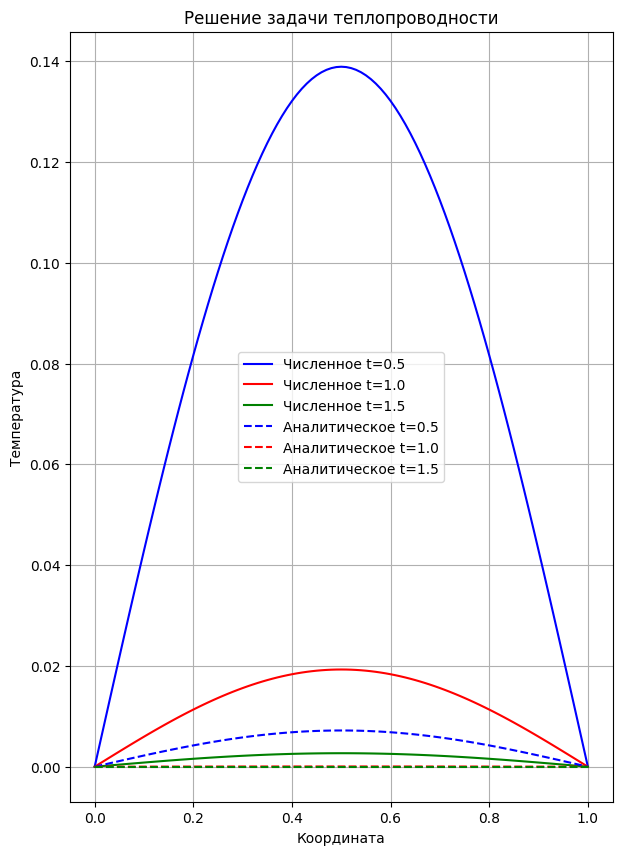

Ошибка = 1.7521326210134802e-05
Временные шаги: t = 0.5, 1.0, 1.5


In [ ]:
sigma = 0.5
h = 0.01 # можно брать какое угодно tau
tau = 0.004
T_max = 3
N = 100

solve_heat_equation(N, sigma, h, tau, T_max, f, k, fi, m1, m2)

# Неустойчивая схема

Неустойчивая схема приводит к резкому увеличению погрешностей, и решение "взрывается" или начинает колебаться без физического смысла. Это происходит, когда параметры τ и h выбраны так, что условия устойчивости нарушаются.

На графике видно, что температура резко возрастает и начинает колебаться. Линии резко поднимаются вверх или вниз, показывая нестабильное поведение.

<ipython-input-13-8618017688b5>:38: RuntimeWarning: overflow encountered in scalar multiply
  (tau * (1 - sigma) / (h ** 2)) *                            # Член, связанный с пространственным шагом
<ipython-input-11-e3a1b25c8562>:12: RuntimeWarning: invalid value encountered in scalar multiply
  b[i + 1] = (F[i] + A[i] * b[i]) / d


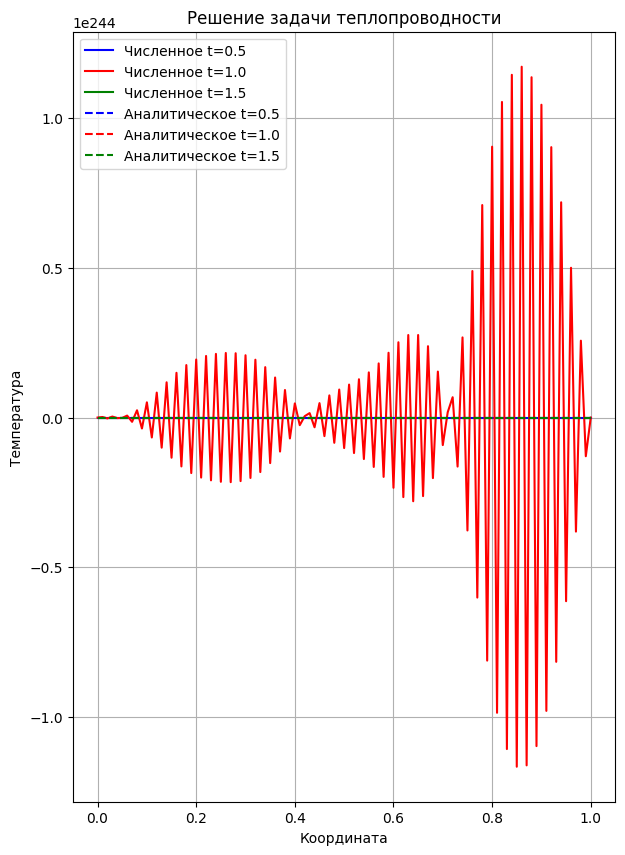

Ошибка = 2.8685037052438675e+306
Временные шаги: t = 0.5, 1.0, 1.5


In [ ]:
sigma = 0.0
h = 0.01
tau = 0.01
T_max = 3
N = 100

solve_heat_equation(N, sigma, h, tau, T_max, f, k, fi, m1, m2)

# Условно устойчивая схема

Условно устойчивая схема стабильна только при определенных соотношениях между шагами по времени и пространству. Если это условие не выполняется, решение может начать колебаться или "взрываться".

На графике можно увидеть, что при выполнении условия устойчивости решение остается стабильным, но при изменении временного шага или пространственного шага решение начинает колебаться, что указывает на потерю устойчивости.

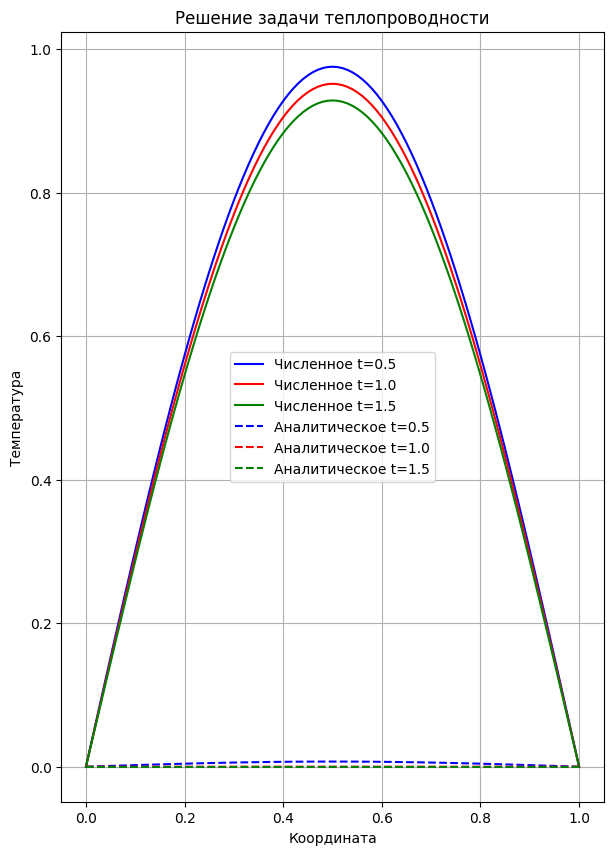

Ошибка = 6.052469419354223e-05
Временные шаги: t = 0.5, 1.0, 1.5


In [ ]:
sigma = 0.0
h = 0.01 # тогда для усл. уст. надо брать: tau <= 0.5*0.0001
tau = 0.00005
T_max = 3
N = 100

solve_heat_equation(N, sigma, h, tau, T_max, f, k, fi, m1, m2)

<ipython-input-13-8618017688b5>:38: RuntimeWarning: overflow encountered in scalar multiply
  (tau * (1 - sigma) / (h ** 2)) *                            # Член, связанный с пространственным шагом
<ipython-input-11-e3a1b25c8562>:12: RuntimeWarning: invalid value encountered in scalar multiply
  b[i + 1] = (F[i] + A[i] * b[i]) / d


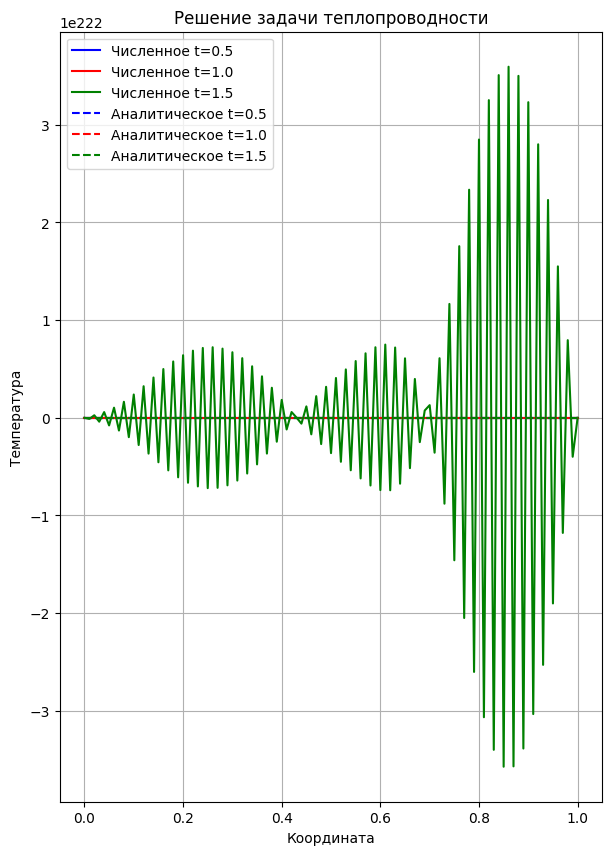

Ошибка = 6.463939681159329e+306
Временные шаги: t = 0.5, 1.0, 1.5


In [ ]:
sigma = 0.0
h = 0.01 # тогда для усл. уст. надо брать: tau <= 0.5*0.0001
tau = 0.001
T_max = 3
N = 100

solve_heat_equation(N, sigma, h, tau, T_max, f, k, fi, m1, m2)

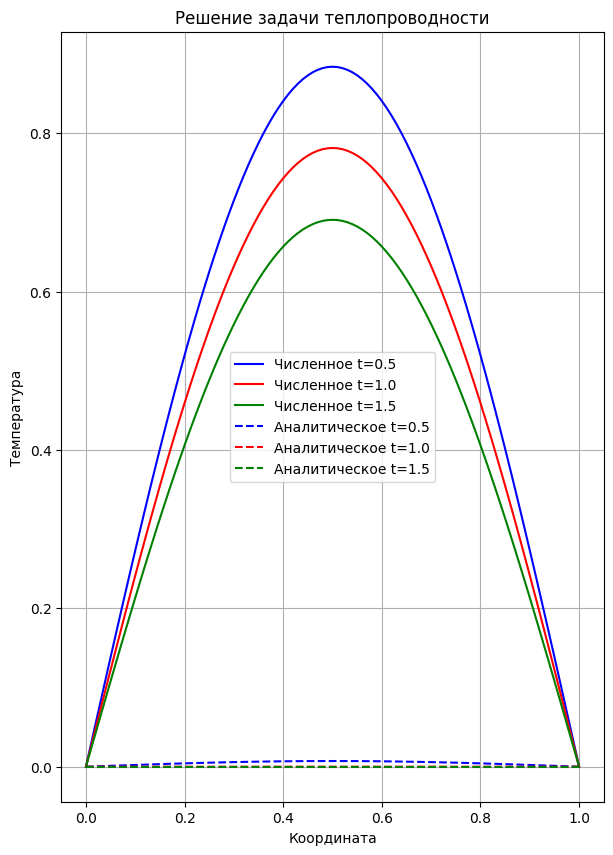

Ошибка = 6.070391609519499e-05
Временные шаги: t = 0.5, 1.0, 1.5


In [ ]:
sigma = 0.4
h = 0.01 # тогда для усл. уст. надо брать tau <= 0.01^2 / (2 - 4*0.4)
tau = 0.00025
T_max = 3
N = 100

solve_heat_equation(N, sigma, h, tau, T_max, f, k, fi, m1, m2)

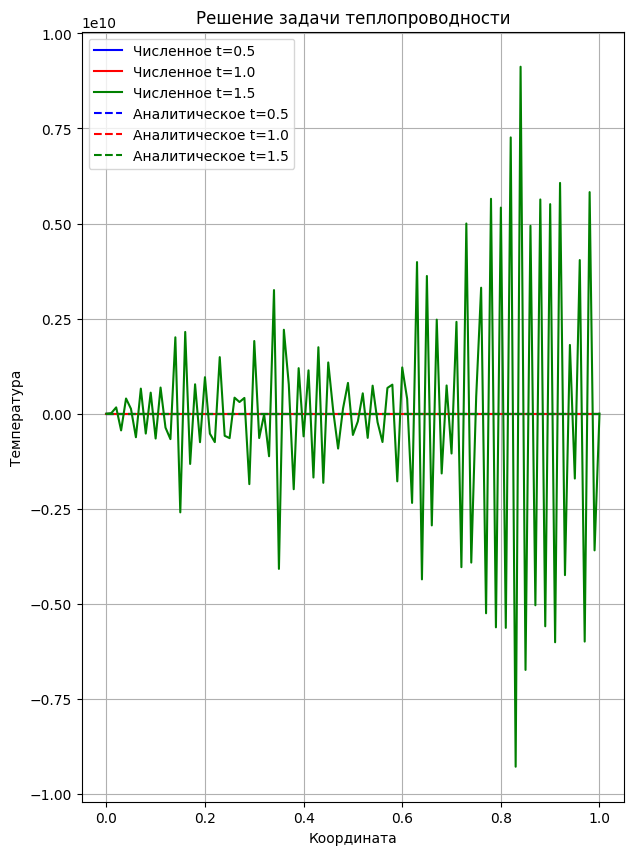

Ошибка = 4.579284606831652e+35
Временные шаги: t = 0.5, 1.0, 1.5


In [ ]:
sigma = 0.4
h = 0.01
tau = 0.01
T_max = 3
N = 100

solve_heat_equation(N, sigma, h, tau, T_max, f, k, fi, m1, m2)